In [49]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, mean_squared_error
from collections import Counter
from sklearn.ensemble import BaggingClassifier

In [149]:
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

n_trees = 10
n_samples = x.shape[0]
random_state = 42

In [155]:
# Random Forest Classifier
# Фунция для создая будстра выборки 

def bootstrap_sample(X, Y):
    n_samples = x.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], Y[indices]

# Функция для голосования деревьев
def majority_vote(predictions):
        vote_counts = Counter(predictions)
        return vote_counts.most_common(1)[0][0]

In [151]:
# Список для хранения обученных деревьев
trees = []


# Шаг 1: Бутстрапинг и обучение каждого дерева
np.random.seed(random_state)

for _ in range(n_trees):
    
    # Получаем бутстрап-выборку
    x_sample, y_sample = bootstrap_sample(x, y)
    
    # Обучаем дерево решений
    tree = DecisionTreeClassifier(max_features='sqrt')
    tree.fit(x_sample, y_sample)
    
    # Добавляем обученное дерево в список
    trees.append(tree)
    

# Шаг 2: Предсказания на тестовой выборке
# Для простоты используем тот же набор данных для предсказаний
y_preds = np.zeros((n_samples, n_trees))

# Получаем предсказания для каждого дерева
for i, tree in enumerate(trees):
    y_preds[:, i] = tree.predict(x)

# Шаг 3: Агрегация предсказаний (голосование большинства)
y_pred_final = np.apply_along_axis(majority_vote, axis=1, arr=y_preds)

# Оценка точности
accuracy = accuracy_score(y, y_pred_final)
print(f'Точность : {accuracy}')

Точность : 0.996


--------------------

-----------------------

In [35]:
x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)

n_trees = 10
n_samples = x.shape[0]
random_state = 42

In [58]:
# Random Forest Regressor
# Фунция для создая будстра выборки 

def bootstrap_sample_regressor(X, Y):
    n_samples = x.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], Y[indices]


In [52]:
trees = []


# Шаг 1: Бутстрапинг и обучение каждого дерева
np.random.seed(random_state)

for _ in range(n_trees):
    
    # Получаем бутстрап-выборку
    x_sample, y_sample = bootstrap_sample_regressor(x, y)
    
    # Обучаем дерево решений
    tree = DecisionTreeRegressor(max_features='sqrt')
    tree.fit(x_sample, y_sample)
    
    # Добавляем обученное дерево в список
    trees.append(tree)
    

# Шаг 2: Предсказания на тестовой выборке
# Для простоты используем тот же набор данных для предсказаний
y_preds = np.zeros((n_samples, n_trees))

# Получаем предсказания для каждого дерева
for i, tree in enumerate(trees):
    y_preds[:, i] = tree.predict(x)
    
    
    
final_pred = np.mean(y_preds, axis=1)

mse = mean_squared_error(y, final_pred)
print(f'MSE: {mse}')

MSE: 117.2208276405766


-----

In [251]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor, BaggingClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor, ARDRegression, BayesianRidge, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [235]:
x, y = datasets.load_breast_cancer(return_X_y=True)

print(x.shape, y.shape)

(569, 30) (569,)


In [237]:
df = pd.DataFrame(x, columns=datasets.load_breast_cancer().feature_names)
df['y'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [247]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[::, :-1], df['y'], test_size=0.3, random_state=1)

In [253]:
import warnings
warnings.filterwarnings('ignore')

model_bagging = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=1)
model_bagging.fit(x_train, y_train)

BaggingClassifier(estimator=LogisticRegression(), random_state=1)

In [254]:
model_bagging.score(x_train, y_train)

0.9547738693467337

In [255]:
model_bagging.score(x_test, y_test)

0.9298245614035088

-----------------

In [258]:
model_forest = RandomForestClassifier()
model_forest.fit(x_train, y_train)

RandomForestClassifier()

In [259]:
model_forest.score(x_train, y_train)

1.0

In [260]:
model_forest.score(x_test, y_test)

0.9473684210526315

---------------

In [23]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

x, y = make_classification(n_samples=100, n_features=1, n_clusters_per_class=1,
                           n_informative=1, n_redundant=0, n_repeated=0, weights=[0.4, 0.6])

In [15]:
class_0 = x[y == 0]
class_1 = x[y == 1]

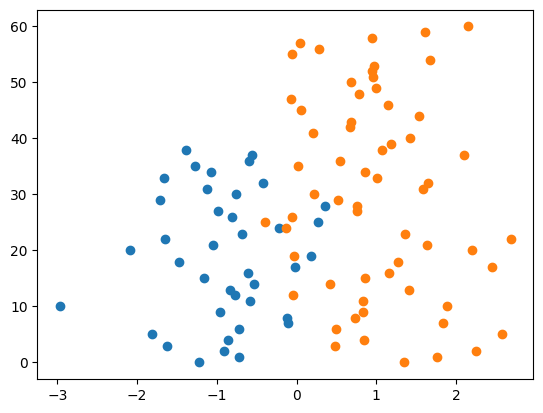

In [16]:
plt.scatter(x[y == 0], range(len(x[y == 0])))
plt.scatter(x[y == 1], range(len(x[y == 1])))
plt.show()

In [38]:
class Bagging:
    def __init__(self, base_model, n_estimators=10):
        self.base_model = base_model      # Базовый алгоритм, например, DecisionTreeClassifier
        self.n_estimators = n_estimators  # Количество моделей в ансамбле
        self.models = []                  # Хранение моделей ансамбля

    def fit(self, X, y):
        self.models = []  # Очистка для повторного обучения
        n_samples = X.shape[0]
        
        # Обучаем n_estimators моделей
        for _ in range(self.n_estimators):
            # Создаем подвыборку с заменой
            X_sample, y_sample = resample(X, y, replace=True, n_samples=n_samples)
            # Создаем копию базового алгоритма и обучаем ее
            model = self.base_model()
            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict(self, X):
        # Получаем предсказания от каждой модели
        predictions = np.array([model.predict(X) for model in self.models])
        # Применяем голосование: выбираем наиболее частый класс для классификации
        final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
        return final_predictions

# Загружаем набор данных Iris
x, y = make_classification(n_samples=100, n_features=1, n_clusters_per_class=1, n_informative=1,
                          n_redundant=0, n_repeated=0, weights=[0.12, 0.88])

# Инициализируем и обучаем наш Bagging
bagging_model = Bagging(base_model=DecisionTreeClassifier, n_estimators=10)
bagging_model.fit(x, y)

# Делаем предсказания
y_pred = bagging_model.predict(x)

# Оцениваем точность
accuracy = accuracy_score(y, y_pred)
print(f"Точность модели Bagging: {accuracy:.2f}")


Точность модели Bagging: 0.99
